# 9과 [예제] 범주 vs 범주

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류  
④ 뉴욕 공기 오염도


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


In [3]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


## 2.교차표(pd.crosstab)
교차표를 연습해 봅시다.

① 타이타닉의 성별에 따른 생존여부의 관계를 교차표로 만들어 봅시다.
* 전체 갯수

In [14]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


* 칼럼기준 비율

In [13]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


* 행 기준 비율

In [11]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


* 전체 기준 비율

In [15]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'all')

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


* 교차표를 통해 성별에 따라 생존여부가 관련 있다고 보이나요?
* 위 교차표 중 어떤 것이 성별-->생존여부 관련성을 확인하기에 적합한가요?

> 관련이 있어 보입니다.  
> normalized = columns를 통해 해당 성별이 사망했는지/생존했는지를 더 쉽게 알 수 있었습니다.

② 타이타닉의 객실등급에 따른 생존여부의 관계를 교차표로 만들어 봅시다.
* 전체 갯수

In [29]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


* 칼럼기준 비율

In [31]:
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize='columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


* 행 기준 비율

In [32]:
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize='index')

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


* 전체 기준 비율

In [33]:
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize='all')

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


* 교차표를 통해 객실 등급에 따라 생존여부가 관련 있다고 보이나요?
* 위 교차표 중 어떤 것이 객실-->생존여부 관련성을 확인하기에 적합한가요?

> 관련이 없어 보입니다.  
> normalized = 'index'를 통해 진행해본결과,  
> - 생존자 그룹에서는 3그룹이 제일 많았고  
> - 사망자 그룹에서는 1그룹이 제일 많았습니다.  

③ 성별과 객실등급 중 어떤 변수가 생존여부를 예측하는데 더 중요한 변수인가요?

> 성별이 더욱 뚜렷하게 나타났기 때문에 성별이 주요한 변수라 생각합니다.

## 3.시각화 : bar chart, mosaic

① Sex --> Survived
* 100% bar chart을 그려봅시다. 

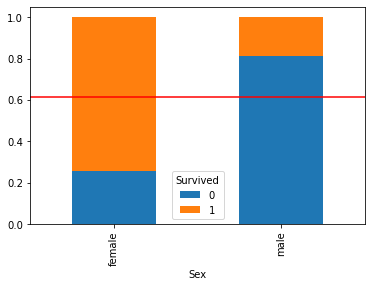

In [35]:
table = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize = 'index')

table.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

* 모자익 플롯을 그려봅시다.

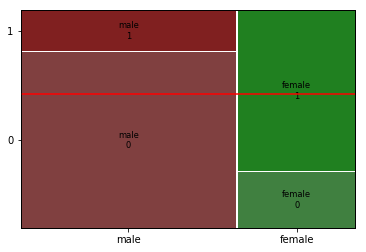

In [37]:
# Sex별 생존여부를 mosaic plot으로 그려 봅시다.

mosaic(titanic, [ 'Sex','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

* 두 차트로 볼 때, 성별에 따라 생존여부가 달라지나요?

> 네 다릅니다.
> - 남자의 경우 사망자가 많았으며
> - 여자의 경우 생존자가 많았습니다.

② Pclass --> Survived
* 100% bar chart을 그려봅시다. 

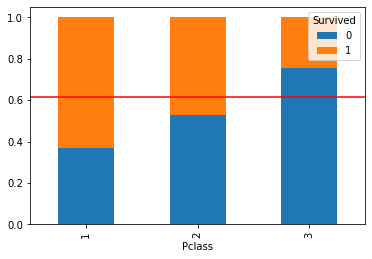

In [38]:
table = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')

table.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

* 모자익 플롯을 그려봅시다.

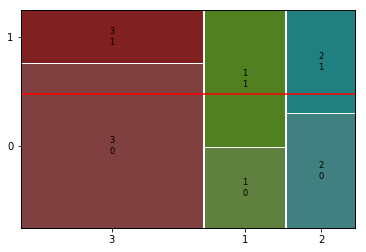

In [39]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

* 두 차트로 볼 때, 성별에 따라 생존여부가 달라지나요?

> 3클래스에서는 사망자가 많았으나, 1-2클래스는 생존자가 많았습니다.  
> 그러나 전체 사망자 평균선에 비해서 2클래스는 비슷하였으며, 1클래스는 뚜렷하게 낮게 형성되었습니다.  
> 그로 인해 클래스가 낮을수록 사망하는사람이 많았으므로 생존여부가 다르다는것을 알 수 있었습니다.  

## 4.수치화 : 카이제곱검정

① Sex --> Survived

In [21]:
# 먼저 집계
table = pd.crosstab(titanic['Sex'], titanic['Survived'])
print(table)
print('=' * 30)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

Survived    0    1
Sex               
female     81  233
male      468  109
카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
기대빈도
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


> p-value의 값이 소수점 58자리에 존재하므로, 거의 0에 수렴한다.  
> 즉, Sex에 따른 Survived의 여부는 관계가 있다고 판단된다.  
> 만약, 서로 독립적이라면 기대빈도와 같이 결정된다.

② Pclass --> Survived

In [26]:
# 먼저 집계
table = pd.crosstab(titanic['Pclass'], titanic['Survived'])
print(table)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량: ', result[0])
print('p-value:', result[1])
print('기대빈도\n', result[3])

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
카이제곱통계량:  102.88898875696056
p-value: 4.549251711298793e-23
기대빈도
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


클래스 별에 따른 생존자의 수는 어느정도 관련이 있다고 보인다.
(p-value의 값이 0에 수렴하기 때문)

3. Title --> Survived

In [28]:
# 먼저 집계
table = pd.crosstab(titanic['Title'], titanic['Survived'])
print(table)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량: ', result[0])
print('p-value:', result[1])
print('기대빈도\n', result[3])

Survived    0    1
Title             
Master     18   23
Miss       55  130
Mr        439   84
Mrs        26  102
Others     11    3
카이제곱통계량:  289.1953165452417
p-value: 2.318405007221846e-61
기대빈도
 [[ 25.26262626  15.73737374]
 [113.98989899  71.01010101]
 [322.25252525 200.74747475]
 [ 78.86868687  49.13131313]
 [  8.62626263   5.37373737]]
